In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression, RFE


pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings("ignore")


In [29]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [30]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [31]:
df.shape

(319795, 18)

In [32]:
df.drop_duplicates()
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [33]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [34]:
df.shape

(319795, 18)

In [35]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [37]:
# easier way to rename from camelcase
# df.columns = [col.lower().replace(" ","_").replace("-","_") for col in df.columns]

In [38]:
df = df.rename(columns = {'HeartDisease':'heart_disease', 'Smoking':'smoking', 'AlcoholDrinking':'alcohol_drinking', 'Stroke':'stroke', 'PhysicalHealth':'physical_health', 'MentalHealth':'mental_health',
                          'DiffWalking':'diff_walking','Sex':'sex', 'AgeCategory':'age_category', 'Race':'race', 'Diabetic':'diabetic', 'PhysicalActivity':'physical_activity','GenHealth':'gen_health',
                          'SleepTime':'sleep_time', 'Asthma':'asthma', 'KidneyDisease':'kidney_disease','SkinCancer':'skin_cancer'})
df.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [39]:
# Use .describe with object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')


HEART_DISEASE
Count:
No     292422
Yes     27373
Name: heart_disease, dtype: int64


Proportions:
No     0.914405
Yes    0.085595
Name: heart_disease, dtype: float64
--------------------------


SMOKING
Count:
No     187887
Yes    131908
Name: smoking, dtype: int64


Proportions:
No     0.587523
Yes    0.412477
Name: smoking, dtype: float64
--------------------------


ALCOHOL_DRINKING
Count:
No     298018
Yes     21777
Name: alcohol_drinking, dtype: int64


Proportions:
No     0.931903
Yes    0.068097
Name: alcohol_drinking, dtype: float64
--------------------------


STROKE
Count:
No     307726
Yes     12069
Name: stroke, dtype: int64


Proportions:
No     0.96226
Yes    0.03774
Name: stroke, dtype: float64
--------------------------


DIFF_WALKING
Count:
No     275385
Yes     44410
Name: diff_walking, dtype: int64


Proportions:
No     0.86113
Yes    0.13887
Name: diff_walking, dtype: float64
--------------------------


SEX
Count:
Female    167805
Male      151990
Name: sex, dtype:

In [82]:
# numerical feature distribution
cont_col = ['BMI','physical_health','mental_health','sleep_time']



for i in range(0,len(cont_col)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x= df[cont_col[i]], y=df['heart_disease'], data=df, orient='h')
    plt.title(cont_col[i] + " Distribution", fontweight='bold')
    plt.show()

KeyError: 'BMI'

<Figure size 800x80 with 0 Axes>

### Takeaways from sample data:
- BMI distribution looks similar from those with and without heart diesease
- Physical health distribution looks to not have a huge impact on those with heart disease versus those without
- Mental health and sleep time look to have no distinct difference in distribution on heart disease either

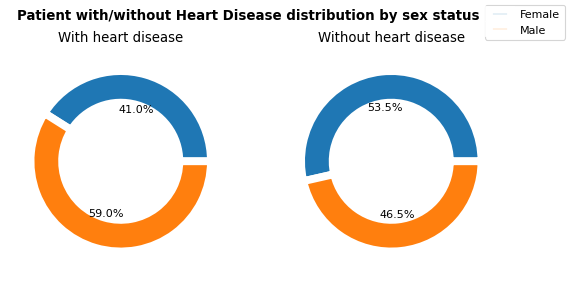

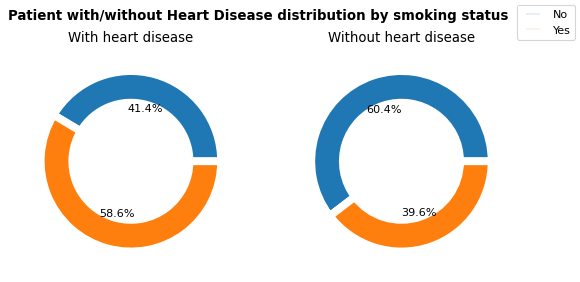

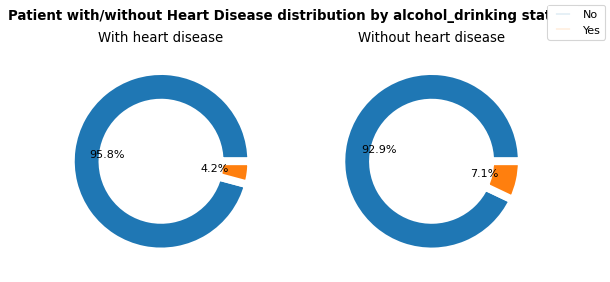

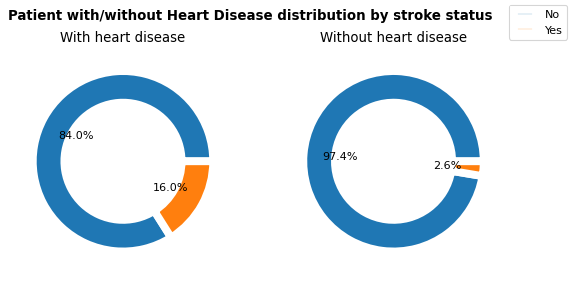

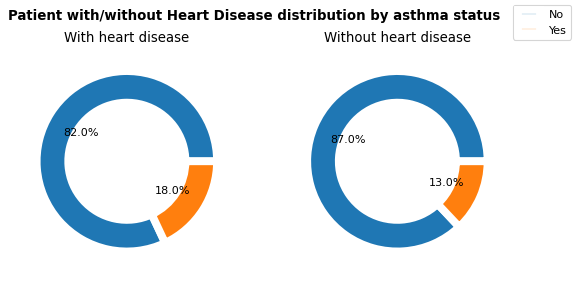

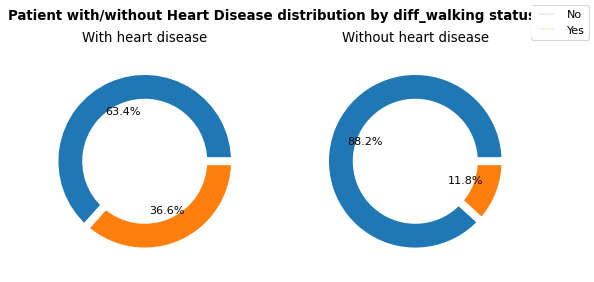

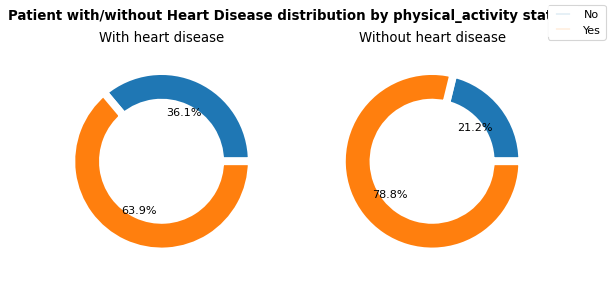

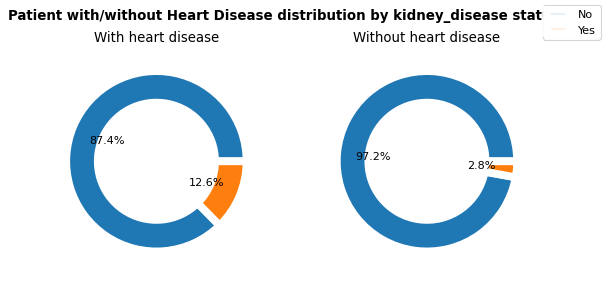

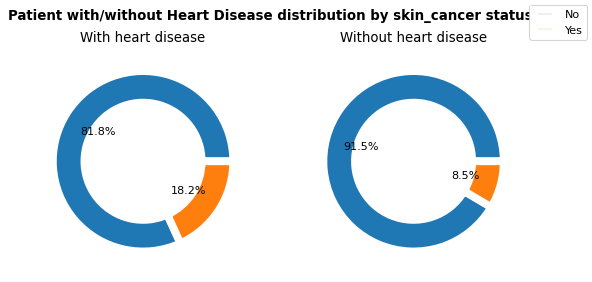

In [41]:
#Binary encoding variables: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Diabetic, Physical Activity, Asthma, KidneyDisease, SkinCancer
binary_cols = ['heart_disease','sex','smoking','alcohol_drinking','stroke','asthma', 'diff_walking','physical_activity','kidney_disease','skin_cancer']


for i in range(1, len(binary_cols)):
    fig = plt.figure(figsize=(8,4), dpi=80)
    
    # Plot distribution of adults with heart disease
    ax1 = plt.subplot(1,2,1)
    df[df['heart_disease'] == 'Yes'].groupby(df[binary_cols[i]]).heart_disease.count().plot(kind='pie', autopct='%.1f%%', labeldistance=None,
                                                                                        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("With heart disease")
    
    # Plot distribution of adults without heart disease
    ax2 = plt.subplot(1,2,2)
    df[df['heart_disease'] == 'No'].groupby(df[binary_cols[i]]).heart_disease.count().plot(kind='pie', autopct='%.1f%%', labeldistance=None,
                                                                                     wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white', 'width':0.35 })
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title("Without heart disease")
    plt.suptitle("Patient with/without Heart Disease distribution by " + binary_cols[i] + " status", fontweight='bold')
    
    handles, labels = ax1.get_legend_handles_labels()

        
    leg = fig.legend(handles, labels, loc = 'upper right', fancybox=True)
    
        
    plt.subplots_adjust(right=0.9)
    plt.show()
    


### Takeaways from sample data:
- Looks to be more male than females with heart disease
- More smokers than non smokers have heart disease
- Being a heavy drinker and having asthma doesn't seem to have noticeable difference in having heart disease 
- People with heart disease seem to have experience a stroke and difficulty while walking more than those who don't
- Physical activity, kidney disease, and skin cancer seem to be distinct factors in those who have heart disease


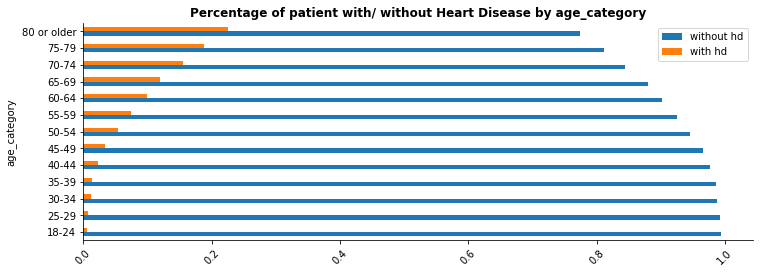

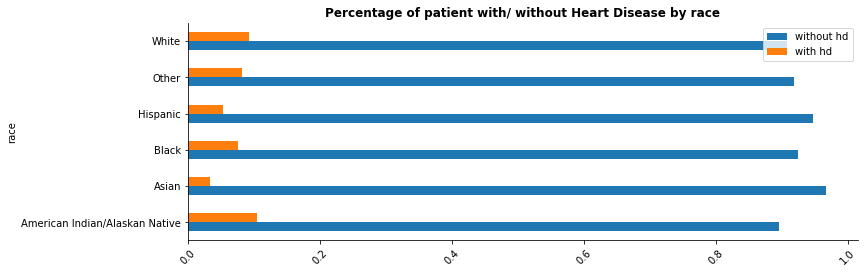

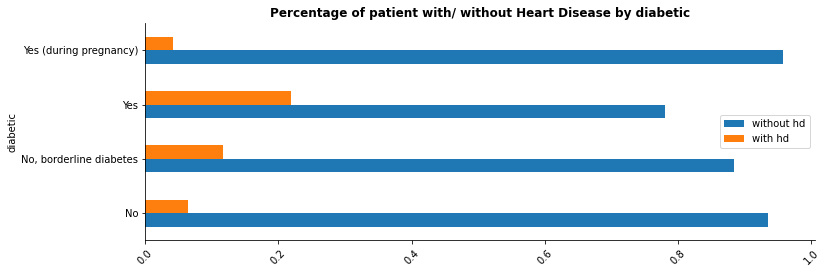

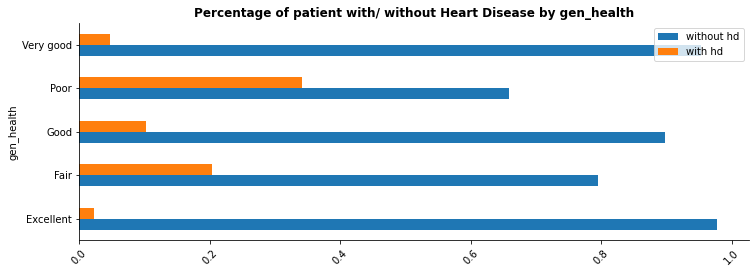

In [42]:
cat_cols = ['age_category','race','diabetic','gen_health']


for i in range(0, len(cat_cols)):
    crosstb = pd.crosstab(df[cat_cols[i]], df.heart_disease)
    crosstb['without_hd_percent'] = crosstb['No'] / (crosstb['No'] + crosstb['Yes'])
    crosstb['with_hd_percent'] = crosstb['Yes'] / (crosstb['No'] + crosstb['Yes'])
    
    crosstb = crosstb.drop(['Yes', 'No'], axis = 1)
    
    crosstb.plot(kind='barh')
    sns.despine()
    labels = ["without hd","with hd"]
    plt.gcf().set_size_inches(12, 4)
    plt.xticks(rotation = 45)
    plt.legend(labels=labels)
    plt.title("Percentage of patient with/ without Heart Disease by " + cat_cols[i], fontweight='bold')
    plt.show()


### Takeaways from sample data:
- As age increases there seems to be a higher presence of heart disease
- Hispanic and asians seem to have lower counts of heart disease than other races
- Diabetics seem to have a high rate of heart disease
- Poor and fair general health seem to have a higher chance of developing heart disease

In [43]:
df.columns

Index(['heart_disease', 'BMI', 'smoking', 'alcohol_drinking', 'stroke',
       'physical_health', 'mental_health', 'diff_walking', 'sex',
       'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health',
       'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer'],
      dtype='object')

In [44]:
# Using drop_first for binary columns

dummy_df = pd.get_dummies(df[['heart_disease', 'smoking', 'alcohol_drinking', 'stroke', 'diff_walking','sex', 'physical_activity', 'asthma', 'kidney_disease', 'skin_cancer']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,heart_disease_Yes,smoking_Yes,alcohol_drinking_Yes,stroke_Yes,diff_walking_Yes,sex_Male,physical_activity_Yes,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes
0,0,1,0,0,0,0,1,1,0,1
1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0


In [45]:
# another dummy_df but not dropping first so i can see all values

dummy_df1 = pd.get_dummies(df[['race','diabetic']])
dummy_df1.head(2)

,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0


In [46]:
cat_col = ['age_category']

for col in cat_col:
    df[col] = df[col].map({'18-24':0, '25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12})
    
df.head(3)

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,9,White,Yes,Yes,Fair,8.0,Yes,No,No


In [47]:
cat_col2 = ['gen_health']

for col in cat_col2:
    df[col] = df[col].map({'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4})
df.head(2)

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7,White,Yes,Yes,3,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,White,No,Yes,3,7.0,No,No,No


In [48]:
new_df = pd.concat([df, dummy_df, dummy_df1], axis = 1)
new_df.head(2)

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer,heart_disease_Yes,smoking_Yes,alcohol_drinking_Yes,stroke_Yes,diff_walking_Yes,sex_Male,physical_activity_Yes,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7,White,Yes,Yes,3,5.0,Yes,No,Yes,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,White,No,Yes,3,7.0,No,No,No,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [49]:
new_df = new_df.drop(columns = ['heart_disease', 'smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'race', 'diabetic', 'physical_activity', 
                            'asthma', 'kidney_disease', 'skin_cancer'])
new_df.head()

,BMI,physical_health,mental_health,age_category,gen_health,sleep_time,heart_disease_Yes,smoking_Yes,alcohol_drinking_Yes,stroke_Yes,diff_walking_Yes,sex_Male,physical_activity_Yes,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
0,16.60,3.0,30.0,7,3,5.0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
1,20.34,0.0,0.0,12,3,7.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,26.58,20.0,30.0,9,1,8.0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
3,24.21,0.0,0.0,11,2,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,23.71,28.0,0.0,4,3,8.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [50]:
# Data is downsampled to balance adults without heart disease and adults with heart disease


class_0 = new_df[new_df['heart_disease_Yes'] == 0]
class_1 = new_df[new_df['heart_disease_Yes'] == 1]

class_0 = class_0.sample(len(class_1), replace = True)
new_df = pd.concat([class_0, class_1], axis = 0)

print(new_df.shape)
print('Heart Disease Counts in Train dataframe')
print(' ')
print(new_df.heart_disease_Yes.value_counts())

(54746, 26)
Heart Disease Counts in Train dataframe
 
0    27373
1    27373
Name: heart_disease_Yes, dtype: int64


## Data is prepped and ready to be split

In [51]:
def split_data(df):
    '''
    This function takes in a dataframe and splits the data into train, validate and test samples. 
    Test, validate, and train are 20%, 24%, & 56% of the original dataset, respectively. 
    The function returns train, validate and test dataframes. 
    '''
    # split dataframe 80/20, stratify on churn to ensure equal proportions in both dataframes
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=123, 
                                            stratify=new_df.heart_disease_Yes)
    # split previous larger dataframe by 70/30, stratify on churn
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.heart_disease_Yes)
    # results in 3 dataframes
    return train, validate, test

In [52]:
train, validate, test = split_data(new_df)

train.shape, validate.shape, test.shape

((30657, 26), (13139, 26), (10950, 26))

In [53]:
train.heart_disease_Yes.value_counts()

1    15329
0    15328
Name: heart_disease_Yes, dtype: int64

### Scaling numerical columns

In [54]:
def scale_data(train, validate, test, return_scaler=False):
    '''
    Scales the 3 data splits.
    
    takes in the train, validate, and test data splits and returns their scaled counterparts.
    
    If return_scaler is true, the scaler object will be returned as well.
    '''
    columns_to_scale = ['BMI', 'mental_health', 'sleep_time', 'physical_health']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    validate_scaled[columns_to_scale] = scaler.transform(validate[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [64]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)
print(train_scaled.shape)
train_scaled.head(2)

(30657, 26)


,BMI,physical_health,mental_health,age_category,gen_health,sleep_time,heart_disease_Yes,smoking_Yes,alcohol_drinking_Yes,stroke_Yes,diff_walking_Yes,sex_Male,physical_activity_Yes,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
126088,0.269504,0.0,0.066667,12,3,0.304348,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
41910,0.235665,1.0,0.000000,9,2,0.260870,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [65]:
corr_heart_disease = train.corr()['heart_disease_Yes'].sort_values(ascending = False)

pd.DataFrame(corr_heart_disease).iloc[1:, :5]

,heart_disease_Yes
age_category,0.435980
diff_walking_Yes,0.297023
diabetic_Yes,0.267898
physical_health,0.243255
stroke_Yes,0.228916
kidney_disease_Yes,0.188367
smoking_Yes,0.176383
skin_cancer_Yes,0.136304
sex_Male,0.122839
BMI,0.095529


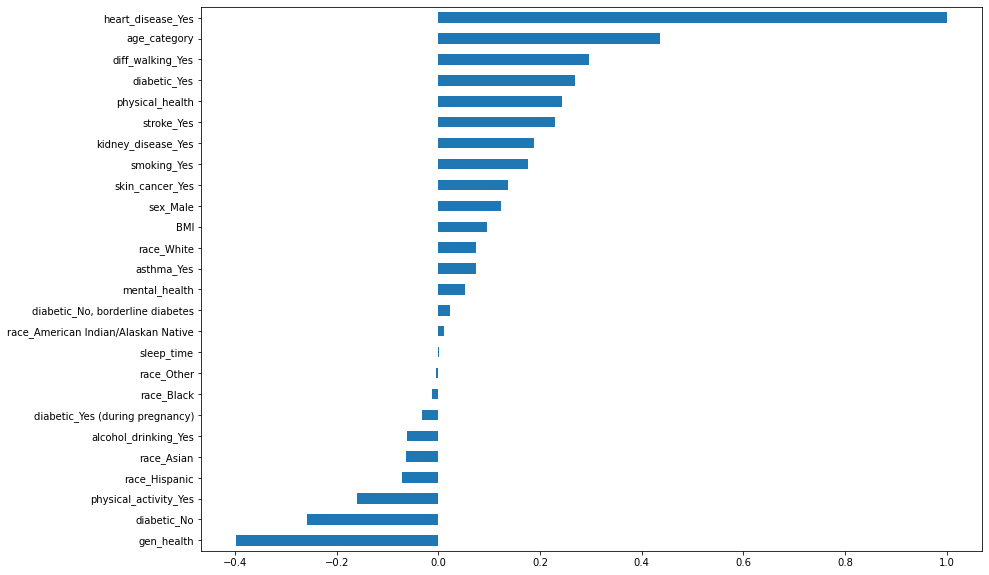

In [66]:
train.corr()['heart_disease_Yes'].sort_values().plot(kind='barh', figsize=(14,10))
None

### Takeaways from correlation sample:
- Variables that may be correlated with heart disease are
- age_category, diff_walking, diabetic_yes, physical_health, stroke_yes, smoking_yes, kidney_disease_Yes, gen_health

## Questions for exploration
- How do the age categories affect heart disease?
- Is diff_walking associated with heart disease?
- Is diabetic_yes associated with heart disease?
- Is smoking_yes associated with heart disease?

# Question 1:

10    4078
12    4067
9     3958
8     3470
11    3214
7     2635
6     2010
5     1468
4     1361
3     1171
0     1169
2     1076
1      980
Name: age_category, dtype: int64


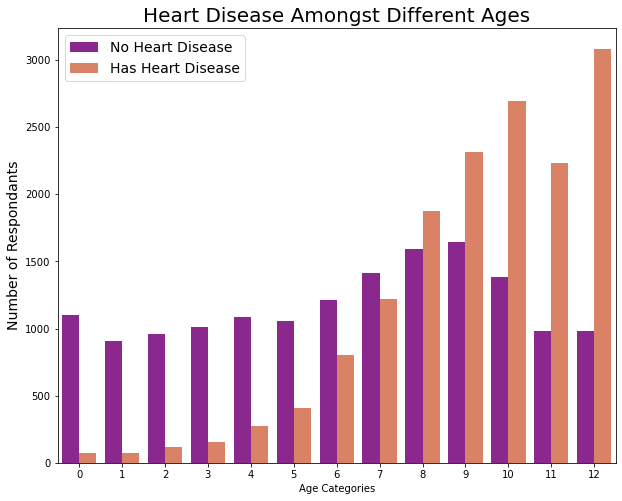

In [67]:
# Looking at the count of customers who have churn vs not churn within the different contract types (using the train data)

plt.figure(figsize = (10, 8))
#Heart = train.loc[train[‘heart_disease_Yes’] == 0]
sns.countplot(x='age_category', hue = 'heart_disease_Yes', palette ='plasma', data = train)
plt.title('Heart Disease Amongst Different Ages', fontsize = 20)
plt.legend(labels = ['No Heart Disease', 'Has Heart Disease'], fontsize = 14)
plt.xlabel('Age Categories')
plt.ylabel('Number of Respondants', fontsize = 14)

print(train.age_category.value_counts(normalize = False))

## Hypothesis testing with Pearson's r

Null Hypothesis : There is no linear relationship between age_category and heart disease

Alternative Hypothesis: There is a linear relationship between age_category and heart disease

In [68]:
# statistical analysis to of visual above

alpha = 0.05

r, p_value = pearsonr(train.heart_disease_Yes, train.age_category)

if p_value > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')
print(f'p-value: {round(p_value,3)}')

We reject the null hypothesis
p-value: 0.0


# Question 2

Text(0, 0.5, 'Number of Respondants')

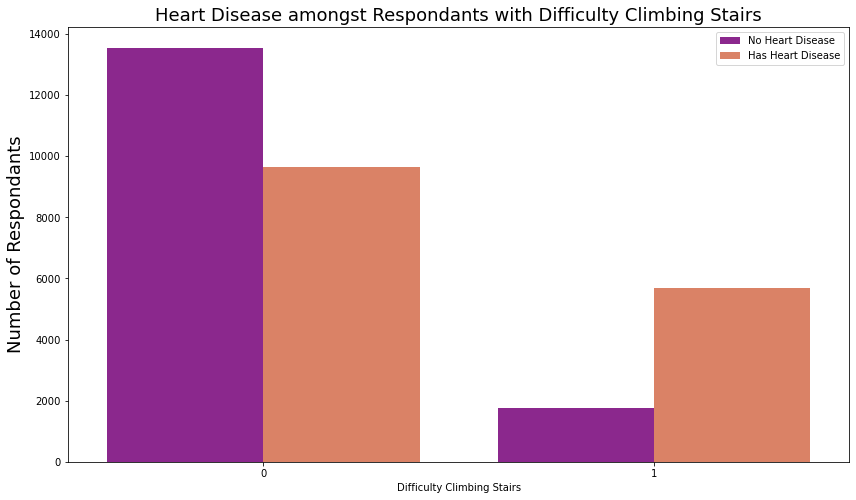

In [69]:
# plot visualization of number of customers churned/not churned by internet service type
plt.figure(figsize=(14,8))
sns.countplot(x='diff_walking_Yes', hue='heart_disease_Yes', palette='plasma', data=train)
plt.title('Heart Disease amongst Respondants with Difficulty Climbing Stairs', fontsize=18)
plt.legend(labels=['No Heart Disease','Has Heart Disease'])
plt.xlabel('Difficulty Climbing Stairs')
plt.ylabel('Number of Respondants', fontsize =18)

### Null Hypothesis - Difficulty Walking and Having heart disease are independent of each other

### Alternative hypothesis - Difficulty Walking and Having heart disease are not independent of each other

In [83]:
alpha = .05 

observed = pd.crosstab(train.heart_disease_Yes, train.diff_walking_Yes)
observed

diff_walking_Yes,0,1
heart_disease_Yes,,
0,13553,1775
1,9647,5682


In [71]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('====================\nExpected\n')
print(expected)
print('====================\n')
print(f'chi^2 = {chi2:.2f}')
print(f'p     = {p:.2f}')
print(' ')
if p<alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Observed

[[13553  1775]
 [ 9647  5682]]
Expected

[[11599.62161986  3728.37838014]
 [11600.37838014  3728.62161986]]

chi^2 = 2703.26
p     = 0.00
 
We reject the null hypothesis.


# Question 3

Is diabetic_yes associated with heart disease?

Text(0, 0.5, 'Number of Respondants')

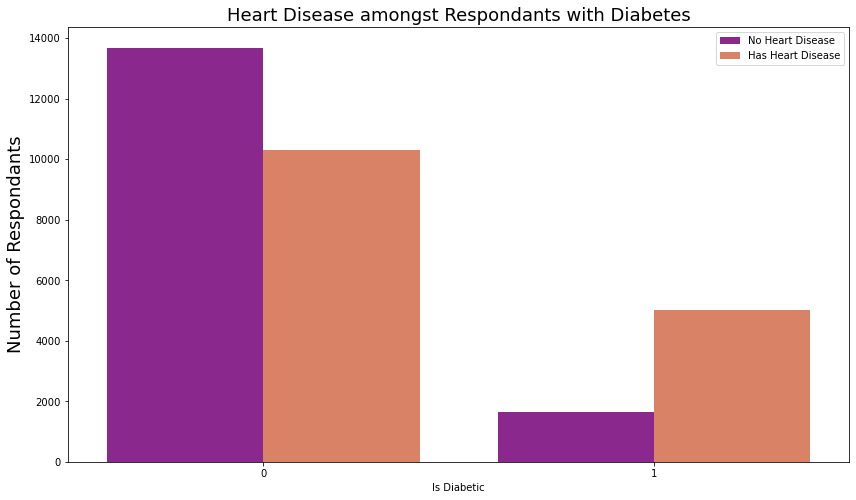

In [85]:
# plot visualization of number of customers churned/not churned by internet service type
plt.figure(figsize=(14,8))
sns.countplot(x='diabetic_Yes', hue='heart_disease_Yes', palette='plasma', data=train)
plt.title('Heart Disease amongst Respondants with Diabetes', fontsize=18)
plt.legend(labels=['No Heart Disease','Has Heart Disease'])
plt.xlabel('Is Diabetic')
plt.ylabel('Number of Respondants', fontsize =18)

# Question 4:

Is smoking_yes associated with heart disease?

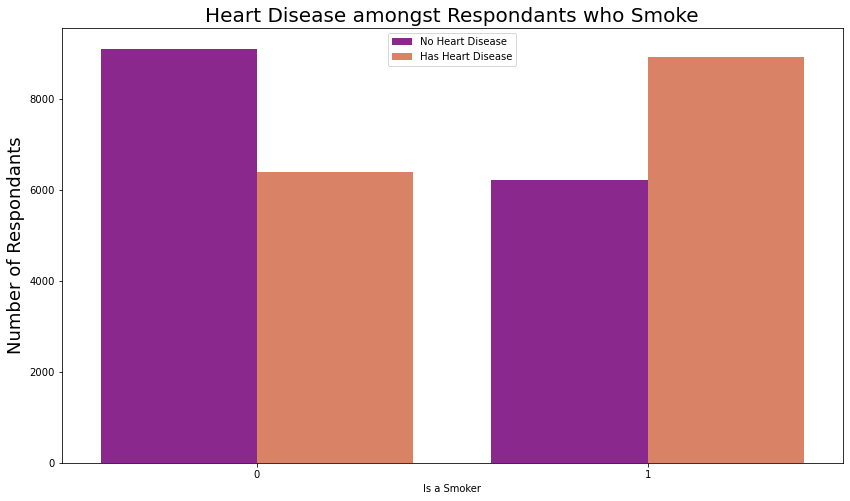

In [88]:
# plot visualization of number of respondants who smoke and have heart disease
plt.figure(figsize=(14,8))
sns.countplot(x='smoking_Yes', hue='heart_disease_Yes', palette='plasma', data=train)
plt.title('Heart Disease amongst Respondants who Smoke', fontsize=20)
plt.legend(labels=['No Heart Disease','Has Heart Disease'])
plt.xlabel('Is a Smoker')
plt.ylabel('Number of Respondants', fontsize =18)
None

### Moving into modeling
- variables must be created

In [72]:
# Create X and y version of train, y is a series of the target variable and X are all the features. 
drop_cols = ['BMI', 'mental_health', 'heart_disease_Yes', 'sleep_time','alcohol_drinking_Yes', 'sex_Male', 'physical_activity_Yes', 'asthma_Yes', 
             'skin_cancer_Yes', 'race_American Indian/Alaskan Native', 'race_Asian', 'race_Black', 'race_Hispanic', 'race_Other', 
             'race_White', 'diabetic_No', 'diabetic_No, borderline diabetes', 'diabetic_Yes (during pregnancy)']

X_train = train_scaled.drop(columns = drop_cols)
y_train = train.heart_disease_Yes

X_validate = validate_scaled.drop(columns = drop_cols)
y_validate = validate.heart_disease_Yes

X_test = test_scaled.drop(columns = drop_cols)
y_test = test.heart_disease_Yes

# Modeling

In [89]:
# Baseline
baseline_accuracy = (train.heart_disease_Yes == 1).mean()
print(f' Any new model must be more accurate than the Baseline Accuracy of {baseline_accuracy :.2%}')


 Any new model must be more accurate than the Baseline Accuracy of 50.00%


## Random Forest

In [74]:
# Evaluate Random Forest models on train & validate set by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
# set value for range
max_value = range(1,15)

# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # fit the model on train
    forest = forest.fit(X_train, y_train)

    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    scores.append(output)

# convert metrics list to a dataframe for easy reading   
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.729947,0.736510,-0.006562
1,2,2,0.741462,0.745262,-0.003800
2,3,3,0.746257,0.749981,-0.003724
3,4,4,0.747953,0.750970,-0.003017
4,5,5,0.748703,0.750438,-0.001734
5,6,6,0.749976,0.751808,-0.001832
6,7,7,0.755097,0.755309,-0.000212
7,8,8,0.755521,0.755233,0.000288
8,9,9,0.758522,0.756831,0.001691
9,10,10,0.760642,0.756146,0.004496


In [75]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
forest = RandomForestClassifier(max_depth=4, min_samples_leaf=4, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy}')
print(f'validate_accuracy: {validate_accuracy}')

train_accuracy: 0.7479531591479923
validate_accuracy: 0.7509703934850446


## KNearest Neighbors

In [76]:
# Evaluate KNearest Neighbors models on train & validate set by looping through different values for k hyperparameter

# create empty list for which to append scores from each loop
scores = []
k_range = range (1,20)
# create loop for range 1-20
for k in k_range:
            
    # define the model setting hyperparameters to values for current loop
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model on train
    knn.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = knn.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = knn.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    scores.append(output)

# convert scores list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,k,train_accuracy,validate_accuracy,difference
0,1,0.739864,0.683233,0.056631
1,2,0.715987,0.663597,0.052390
2,3,0.742082,0.707816,0.034265
3,4,0.738820,0.703022,0.035798
4,5,0.741886,0.717787,0.024099
5,6,0.738396,0.712764,0.025632
6,7,0.744006,0.722429,0.021577
7,8,0.745507,0.720831,0.024676
8,9,0.743778,0.729431,0.014346
9,10,0.746811,0.730954,0.015858


## Logistic Regression

In [77]:
# Evaluate Logistic Regression models on train & validate set by looping through different values for c hyperparameter

# create empty list for which to append metrics from each loop
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
            
    # define the model setting hyperparameters to values for current loop
    logit = LogisticRegression(C=c)
    
    # fit the model on train
    logit.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = logit.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = logit.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)

# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(metrics)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,C,train_accuracy,validate_accuracy,difference
0,0.001,0.748410,0.754928,-0.006518
1,0.005,0.752128,0.755461,-0.003332
2,0.010,0.753140,0.756222,-0.003082
3,0.050,0.753237,0.756831,-0.003593
4,0.100,0.753401,0.757059,-0.003659
5,0.500,0.753335,0.756907,-0.003572
6,1.000,0.753368,0.756907,-0.003539
7,5.000,0.752879,0.756679,-0.003800
8,10.000,0.752879,0.756679,-0.003800
9,50.000,0.752879,0.756679,-0.003800


In [78]:
# Create LogisticRegression
lr = LogisticRegression(random_state=123)
lr.fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test,lr_y_predict)}')
print(f'Precision_score: {precision_score(y_test,lr_y_predict)}')
print(f'Recall_score: {recall_score(y_test,lr_y_predict)}')
print(f'F1-score: {f1_score(y_test,lr_y_predict)}')

model: LogisticRegression(random_state=123)
Accuracy_score: 0.7489497716894977
Precision_score: 0.7383700594613501
Recall_score: 0.7711415525114155
F1-score: 0.7544000714732422


In [79]:
def model_accuracy(X_train, y_train, X_validate, y_validate, X_test, y_test):
    #Define features used for the model
    x_cols =['age_category', 'diff_walking', 'diabetic_yes', 'physical_health', 'stroke_yes', 'smoking_yes', 'kidney_disease_Yes', 'gen_health']
    #Create Logistic Regression Model
    logit = LogisticRegression(random_state=123)
    # Fit the model
    logit.fit(X_train, y_train)
    # Establish weights
    weights = logit.coef_.flatten()
    # Establish intercept
    pd.DataFrame(weights, x_cols).reset_index().rename(columns={'index': 'x_cols', 0: 'weight'})
    logit = LogisticRegression(C=1, random_state=123)
    logit.fit(X_train, y_train)
    # Create a Random Forest model and set the number of trees and the max depth of 6 
    # based on loop used to find best performing k-value
    # Create the model with max depth of 16
    rf = RandomForestClassifier(max_depth=8,min_samples_leaf=8,random_state=123)
    # Fit the model
    rf.fit(X_train, y_train)  
    # Create a KNN model and set the number of neighbors to be used at 5
    knn = KNeighborsClassifier(n_neighbors=4)
    # Fit the model
    knn.fit(X_train,y_train)
    # Print the accuracy of each model
    print('====================================================================')
    # Accuracy on train for  Logistic Regression:
    print(f'Accuracy of Logistic Regression on the training set is {(logit.score(X_train, y_train)):.2%}')
    # Accurcy on validate for Logistic Regression:
    print(f'Accuracy of Logistic Regression on the validation set is {(logit.score(X_validate, y_validate)):.2%}')
    print('--------------------------------------------------------------------')
    # Accuracy on train for the Random Forest:
    print(f'Accuracy of Random Forest on the training set is {(rf.score(X_train, y_train)):.2%}')
    # Accurcy on validate for the Random Forest:
    print(f'Accuracy of Random Forest on the validation set is {(rf.score(X_validate, y_validate)):.2%}')
    print('--------------------------------------------------------------------')
    # Accuracy on train for  KNN:
    print(f'Accuracy of KNN on the training set is {(knn.score(X_train, y_train)):.2%}')
    # Accurcy on validate for KNN:
    print(f'Accuracy of KNN on the validation set is {(knn.score(X_validate, y_validate)):.2%}')
    print('====================================================================')
    return 

In [80]:
model_accuracy(X_train, y_train, X_validate, y_validate, X_test, y_test)

Accuracy of Logistic Regression on the training set is 75.34%
Accuracy of Logistic Regression on the validation set is 75.69%
--------------------------------------------------------------------
Accuracy of Random Forest on the training set is 75.55%
Accuracy of Random Forest on the validation set is 75.52%
--------------------------------------------------------------------
Accuracy of KNN on the training set is 73.88%
Accuracy of KNN on the validation set is 70.30%


In [117]:
def KNN_test(X_test, y_test, df):
    #Create the model
    model =  KNeighborsClassifier(n_neighbors=4)
    # Fit the model
    model.fit(X_test, y_test)
    # Evaluate the model
    # Accuracy on train for the Decision Tree:
    df['baseline'] = 0
    baseline_accuracy = (df.baseline == df.heart_disease_Yes).mean()
    print('==================================================================')
    print(f'Baseline accuracy for the training data set is {(baseline_accuracy):.2%}')
    # Accuracy on validate for the KNN:
    print(f'Accuracy of Decision Tree Classifier on the test set is {(model.score(X_test, y_test)):.2%}')
    print('------------------------------------------------------------------')
    # By how much
    print(f'Accuracy gained with use of the new model on the test set is {(model.score(X_test, y_test) - baseline_accuracy):.2%}') 
    print('==================================================================')

In [119]:
KNN_test(X_test, y_test, test)

Baseline accuracy for the training data set is 91.44%
Accuracy of Decision Tree Classifier on the test set is 91.80%
------------------------------------------------------------------
Accuracy gained with use of the new model on the test set is 0.36%
